# تحلیل مقالات مرتبط با کووید-۱۹

در این چالش، ما به موضوع همه‌گیری کووید ادامه می‌دهیم و بر پردازش مقالات علمی مرتبط با این موضوع تمرکز می‌کنیم. یک مجموعه داده به نام [CORD-19 Dataset](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) وجود دارد که شامل بیش از ۷۰۰۰ مقاله (در زمان نگارش) درباره کووید است. این مجموعه داده همراه با فراداده و چکیده مقالات ارائه شده است (و برای حدود نیمی از آنها متن کامل نیز در دسترس است).

یک مثال کامل از تحلیل این مجموعه داده با استفاده از سرویس شناختی [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) در [این پست وبلاگ](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) توضیح داده شده است. ما نسخه ساده‌تری از این تحلیل را مورد بحث قرار خواهیم داد.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## دریافت داده‌ها

ابتدا باید متادیتای مقالات CORD که قصد کار با آن‌ها را داریم، دریافت کنیم.

**NOTE**: ما نسخه‌ای از این مجموعه داده را به‌عنوان بخشی از این مخزن ارائه نمی‌دهیم. ممکن است ابتدا نیاز باشد فایل [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) را از [این مجموعه داده در Kaggle](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) دانلود کنید. ممکن است نیاز به ثبت‌نام در Kaggle باشد. همچنین می‌توانید این مجموعه داده را بدون نیاز به ثبت‌نام [از اینجا](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html) دانلود کنید، اما این نسخه شامل تمام متن‌های کامل به‌علاوه فایل متادیتا خواهد بود.

ما تلاش می‌کنیم داده‌ها را مستقیماً از منبع آنلاین دریافت کنیم، اما اگر این کار ناموفق بود، باید داده‌ها را همان‌طور که در بالا توضیح داده شد، دانلود کنید. همچنین، اگر قصد دارید بیشتر با این داده‌ها کار کنید، منطقی است که آن‌ها را دانلود کنید تا در زمان انتظار صرفه‌جویی شود.

> **NOTE** که این مجموعه داده بسیار بزرگ است، حدود ۱ گیگابایت حجم دارد، و اجرای خط کد زیر ممکن است زمان زیادی طول بکشد! (~۵ دقیقه)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

ما اکنون ستون تاریخ انتشار را به `datetime` تبدیل می‌کنیم و هیستوگرام را رسم می‌کنیم تا محدوده تاریخ‌های انتشار را ببینیم.


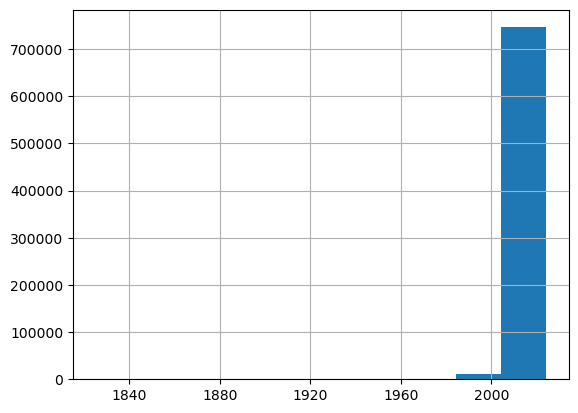

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## استخراج داده‌های ساختاریافته

بیایید ببینیم چه نوع اطلاعاتی را می‌توان به‌راحتی از چکیده‌ها استخراج کرد. یکی از چیزهایی که ممکن است به آن علاقه‌مند باشیم، بررسی استراتژی‌های درمانی موجود و نحوه تکامل آن‌ها در طول زمان است. برای شروع، می‌توانیم به‌صورت دستی فهرستی از داروهای احتمالی مورد استفاده برای درمان کووید و همچنین فهرستی از تشخیص‌ها تهیه کنیم. سپس این فهرست‌ها را مرور کرده و اصطلاحات مربوطه را در چکیده مقالات جستجو می‌کنیم.


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


ما ستون‌های متعددی به دیتافریم خود اضافه کرده‌ایم که تعداد دفعات حضور یک دارو یا تشخیص خاص را در چکیده نشان می‌دهند.

> **توجه**: هنگام جستجوی یک زیررشته، به ابتدای کلمه یک فاصله اضافه می‌کنیم. اگر این کار را انجام ندهیم، ممکن است نتایج اشتباهی بگیریم، زیرا *chloroquine* ممکن است در زیررشته *hydroxychloroquine* نیز پیدا شود. همچنین، ستون چکیده‌ها را به `str` تبدیل می‌کنیم تا از بروز خطا جلوگیری کنیم - سعی کنید `str` را حذف کنید و ببینید چه اتفاقی می‌افتد.

برای ساده‌تر کردن کار با داده‌ها، می‌توانیم زیرمجموعه‌ای از دیتافریم را که فقط شامل شمارش داروها است استخراج کنیم و تعداد تجمعی وقوع‌ها را محاسبه کنیم. این کار محبوب‌ترین دارو را به ما نشان می‌دهد:


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

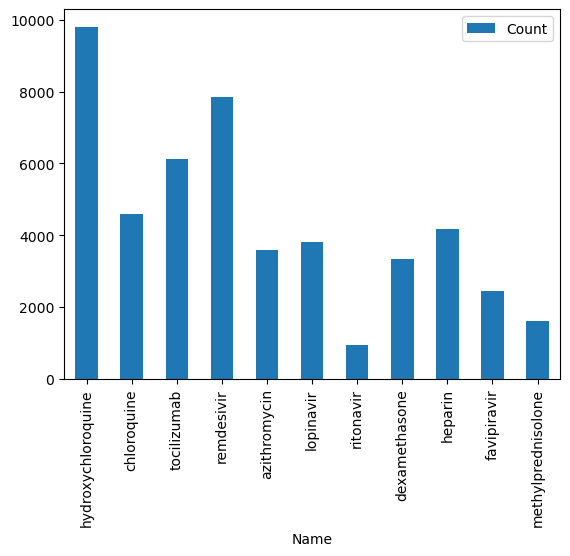

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## بررسی روندها در استراتژی درمان

در مثال بالا، ما تمام مقادیر را `sum` کردیم، اما می‌توانیم همین کار را به صورت ماهانه نیز انجام دهیم:


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

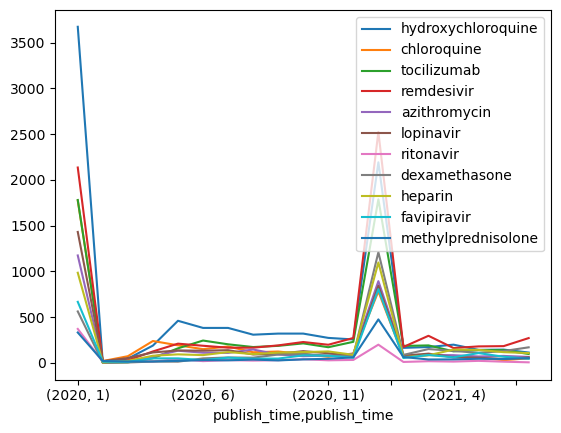

In [152]:
dfmt.plot()
plt.show()

یک مشاهده جالب این است که ما در دو نقطه شاهد افزایش‌های بزرگی هستیم: ژانویه ۲۰۲۰ و ژانویه ۲۰۲۱. این موضوع به این دلیل است که برخی مقالات تاریخ انتشار مشخصی ندارند و به عنوان ژانویه سال مربوطه ثبت شده‌اند.

برای درک بهتر داده‌ها، بیایید فقط چند دارو را تجسم کنیم. همچنین داده‌های مربوط به ژانویه را "پاک" می‌کنیم و آن را با مقداری متوسط جایگزین می‌کنیم تا نمودار زیباتری داشته باشیم:


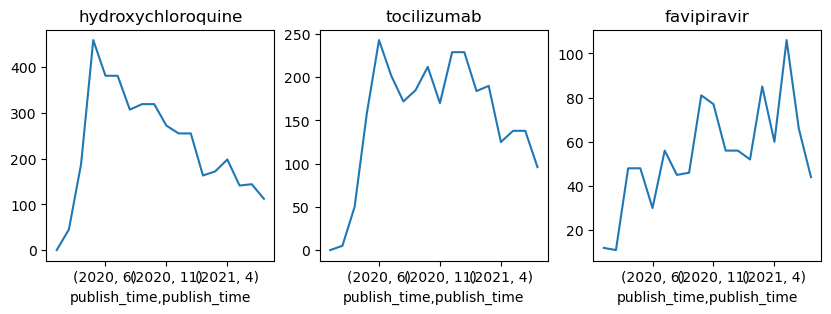

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

مشاهده کنید که چگونه محبوبیت هیدروکسی کلروکین در چند ماه اول افزایش یافت و سپس شروع به کاهش کرد، در حالی که تعداد اشاره‌ها به فاویپیراویر افزایش پایداری را نشان می‌دهد. یک روش خوب دیگر برای نمایش محبوبیت نسبی استفاده از **نمودار انباشته** (یا **نمودار ناحیه‌ای** در اصطلاح پانداها) است:


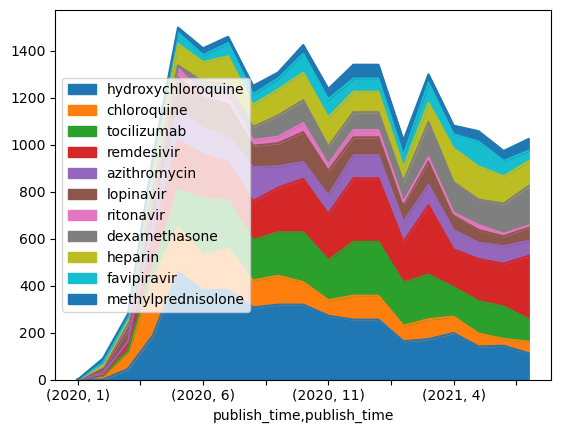

In [154]:
dfmt.plot.area()
plt.show()

حتی بیشتر، می‌توانیم محبوبیت نسبی را به درصد محاسبه کنیم:


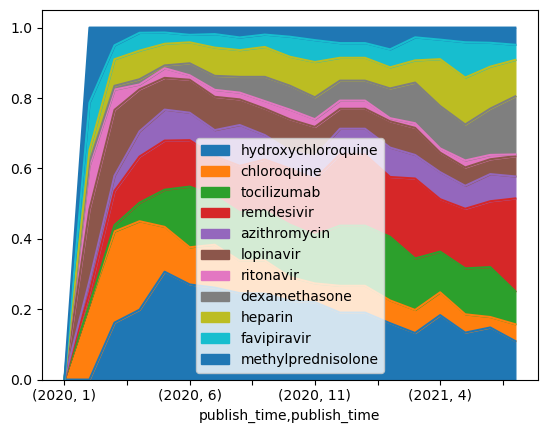

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## محاسبه تطابق بین داروها و تشخیص‌ها

یکی از جالب‌ترین روابطی که می‌توانیم بررسی کنیم این است که چگونه تشخیص‌های مختلف با داروهای متفاوت درمان می‌شوند. برای تجسم این رابطه، نیاز داریم که **نقشه فراوانی هم‌رخدادی** را محاسبه کنیم، که نشان می‌دهد چند بار دو اصطلاح در یک مقاله با هم ذکر شده‌اند.

این نقشه در واقع یک ماتریس دو بعدی است که بهترین روش برای نمایش آن استفاده از **آرایه numpy** است. ما این نقشه را با مرور تمام چکیده‌ها و علامت‌گذاری موجودیت‌هایی که در آنجا ظاهر می‌شوند، محاسبه خواهیم کرد:


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

یکی از روش‌های تجسم این ماتریس، رسم یک **نقشه حرارتی** است:


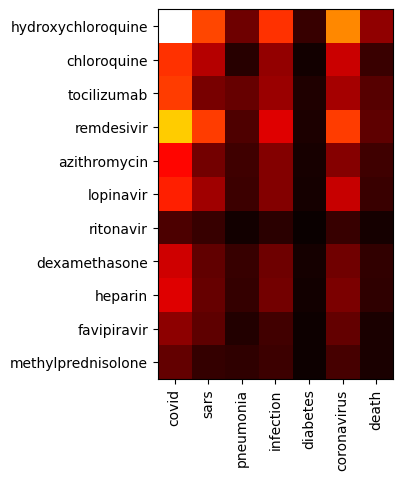

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

با این حال، برای تجسم بهتر می‌توان از نمودار **Sankey** استفاده کرد! کتابخانه `matplotlib` به‌صورت پیش‌فرض از این نوع نمودار پشتیبانی نمی‌کند، بنابراین باید از [Plotly](https://plotly.com/python/) استفاده کنیم، همان‌طور که در [این آموزش](https://plotly.com/python/sankey-diagram/) توضیح داده شده است.

برای ساخت نمودار Sankey با Plotly، باید لیست‌های زیر را ایجاد کنیم:
* لیست `all_nodes` که شامل تمام گره‌های موجود در گراف است، این گره‌ها شامل داروها و تشخیص‌ها خواهند بود.
* لیست شاخص‌های مبدا و مقصد - این لیست‌ها نشان می‌دهند که کدام گره‌ها به سمت چپ و کدام به سمت راست نمودار می‌روند.
* لیست تمام لینک‌ها، که هر لینک شامل موارد زیر است:
   - شاخص مبدا در آرایه `all_nodes`
   - شاخص مقصد
   - مقداری که نشان‌دهنده قدرت لینک است. این مقدار دقیقاً همان مقداری است که از ماتریس هم‌رخدادی به دست می‌آید.
   - به‌صورت اختیاری، رنگ لینک. ما گزینه‌ای اضافه می‌کنیم تا برخی از اصطلاحات را برای وضوح بیشتر برجسته کنیم.

کد عمومی برای رسم نمودار Sankey به‌صورت یک تابع جداگانه به نام `sankey` ساختاردهی شده است. این تابع دو لیست (دسته‌بندی‌های مبدا و مقصد) و ماتریس هم‌رخدادی را دریافت می‌کند. همچنین به ما این امکان را می‌دهد که یک آستانه مشخص کنیم و تمام لینک‌هایی که ضعیف‌تر از آن آستانه هستند را حذف کنیم - این کار نمودار را کمی ساده‌تر می‌کند.


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## نتیجه‌گیری

شما مشاهده کردید که می‌توانیم با استفاده از روش‌های نسبتاً ساده، اطلاعات را از منابع داده غیرساختاریافته، مانند متن، استخراج کنیم. در این مثال، ما از لیست موجود داروها استفاده کردیم، اما استفاده از تکنیک‌های پردازش زبان طبیعی (NLP) برای استخراج موجودیت‌ها از متن بسیار قدرتمندتر خواهد بود. در [این پست وبلاگ](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) توضیح داده‌ایم که چگونه می‌توان از خدمات ابری برای استخراج موجودیت‌ها استفاده کرد. گزینه دیگر استفاده از کتابخانه‌های NLP پایتون مانند [NLTK](https://www.nltk.org/) است - رویکردی برای استخراج اطلاعات از متن با استفاده از NLTK در [اینجا](https://www.nltk.org/book/ch07.html) توضیح داده شده است.


## چالش

به تحقیق درباره داده‌های مقالات مرتبط با کووید در خطوط زیر ادامه دهید:

1. ماتریس هم‌رخدادی داروهای مختلف را بسازید و بررسی کنید کدام داروها اغلب با هم رخ می‌دهند (یعنی در یک چکیده ذکر شده‌اند). می‌توانید کد مربوط به ساخت ماتریس هم‌رخدادی برای داروها و تشخیص‌ها را تغییر دهید.
1. این ماتریس را با استفاده از نقشه حرارتی (heatmap) بصری‌سازی کنید.
1. به عنوان یک هدف چالشی، ممکن است بخواهید هم‌رخدادی داروها را با استفاده از [نمودار کمان](https://en.wikipedia.org/wiki/Chord_diagram) بصری‌سازی کنید. [این کتابخانه](https://pypi.org/project/chord/) ممکن است به شما در رسم نمودار کمان کمک کند.
1. به عنوان یک هدف چالشی دیگر، سعی کنید دوزهای مختلف داروها (مانند **400mg** در *روزانه 400mg کلروکین مصرف کنید*) را با استفاده از عبارات منظم استخراج کنید و یک دیتافریم بسازید که دوزهای مختلف برای داروهای مختلف را نشان دهد. **توجه**: مقادیر عددی که در نزدیکی متنی نام دارو قرار دارند را در نظر بگیرید.



---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما تلاش می‌کنیم دقت را حفظ کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است شامل خطاها یا نادرستی‌ها باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حساس، توصیه می‌شود از ترجمه حرفه‌ای انسانی استفاده کنید. ما مسئولیتی در قبال سوءتفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
